In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression


In [2]:

#Import the raw data set into a Pandas DataFrame.
lasso = pd.read_csv('LASSO-data-set.csv')

In [3]:
lasso.head()

,strength,dexterity,constitution,wisdom,intelligence,charisma,weight,height,modifier1,modifier2,modifier3,modifier4,modifier5,modifier6,modifier7,modifier8,score
0,156,181,54,61,159,60,170,58,56,60,56,60,6,4,4,4,652.566513
1,148,137,89,147,159,79,166,84,47,44,53,49,11,10,5,8,413.145270
2,164,144,79,143,164,84,175,80,51,56,53,56,7,13,12,8,510.830805
3,176,53,84,178,198,85,180,88,37,38,40,36,5,5,0,5,392.261796
4,164,86,86,75,185,93,180,89,45,47,46,48,-1,2,-1,3,472.258696


In [4]:
#Separate the independent variables from the dependent variables.
y = lasso['strength']
X = lasso.drop(columns = 'strength').copy()

In [5]:
#Create a training set that's 75% of your data set and a complementary test set with the remaining 25%. Specify random_state=0.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=0)


In [6]:
#Train the model using the LassoCV class, which has built-in cross-validation.
# Use this to tune your alphas hyperparameter. 
# What value of this hyperparameter performs best in cross-validation?
# inspo: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
test = sklearn.linear_model.LassoCV(alphas=[13], random_state=0).fit(X_train,y_train)
test.coef_


array([ 0.        ,  0.        , -0.        ,  0.02948639,  0.        ,
        0.63409044,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00143695])

In [7]:
#After cross-validation, use your model to generate predictions on the test set, 
predictions = test.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

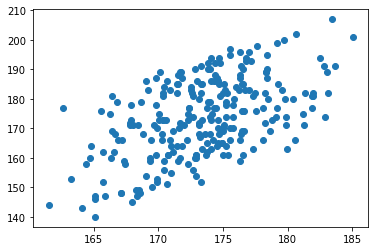

In [8]:
# then create two scatter plots: one with predicted values against actual values 
plt.scatter(predictions, y_test)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

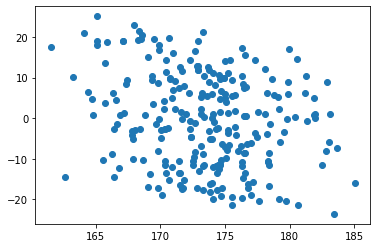

In [9]:
# and another with residuals against predicted values. 
plt.scatter(predictions, predictions-y_test)
plt.show

In [10]:
# Print the model's coefficient of determination with the .score() method 
test.score(X_test, y_test)

0.25289360913419945

In [11]:
#and the median absolute error with scikit-learn's median_absolute_error class.
sklearn.metrics.median_absolute_error(y_test, predictions)


9.416347017154237

In [12]:
#Print out the actual model in equation form, i.e., y = b + c1x1 + c2x2 + c3x3 + .... 
# How many features did LASSO retain? How many features were in your original data set?

In [13]:
#Using the same data set, fit a traditional linear regression (not LASSO) model. 
# Use scikit-learn's LinearRegression class.
reg = sklearn.linear_model.LinearRegression().fit(X_train, y_train)

In [14]:
# Use your linear regression model to generate predictions on the test set
predictions = reg.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

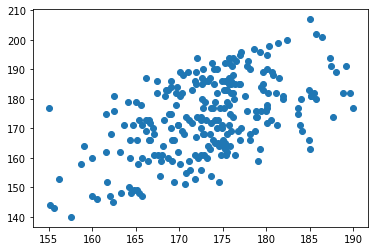

In [18]:
# then create two scatter plots: one with predicted values against actual values 
plt.scatter(predictions, y_test)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

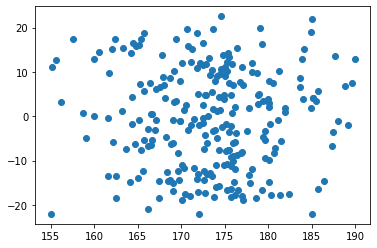

In [19]:
# and another with residuals against predicted values. 
plt.scatter(predictions, predictions-y_test)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

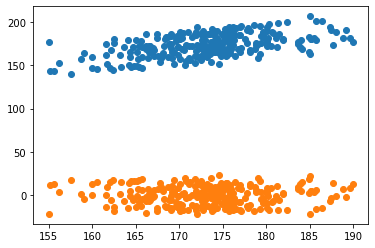

In [20]:
plt.scatter(predictions, y_test)
plt.show

plt.scatter(predictions, predictions-y_test)
plt.show

In [16]:
# Print the model's coefficient of determination with the .score() method 
test.score(X_test, y_test)

0.25289360913419945

In [17]:
# and the median absolute error with scikit-learn's median_absolute_error class.
sklearn.metrics.median_absolute_error(y_test, predictions)


9.01520104787491

In [ ]:
# Print out the actual model in equation form, i.e., y = b + c1x1 + c2x2 + c3x3 + ....
# Write a few sentences comparing the differences you observe between your LASSO model and your traditional model.